# Overview

k Nearest Neighbor algorithm falls under the supervised Learning category and is used for classification (most commonly) and regression.
It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name suggests it considers KNN to predict the class or continous value for the new datapoint.

### Classification with KNN
> Advantages of KNN
   1. Simple to understand and explain
   2. Model training phase is fast
   3. Non-Parametric (does not presume a "form" of the "decision boundary")
     1. can be used to estimate many shapes of decision boundaries

> Disadvantages of KNN
   1. Predication phase can be slow when number of observations or number of features is large
   2. Sensitive to irrelevant features (feature selection is important)

## Algorithm's learning is:
1. Instance based learning: Here we do not learn weights from training data to predict output but use entire training instances to predict output for unseen data.
2. Layz learning: Model is not learned using training data prior and learning process is postponed to a time when prediction is requested on the new instance.
3. Non-parametric: In KNN, there is no predefined from of the mapping function

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
type(iris.data)

numpy.ndarray

In [4]:
iris.data[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
species = [iris.target_names[i] for i in iris.target]

In [11]:
df['species'] = species

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.groupby('species').sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [15]:
df.groupby('species')['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()

<ipython-input-15-a1bc00548a43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('species')['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
df.groupby('species').agg([np.min, np.max])

sepal_length      sepal_width      petal_length      petal_width  \
                   amin amax        amin amax         amin amax        amin   
species                                                                       
setosa              4.3  5.8         2.3  4.4          1.0  1.9         0.1   
versicolor          4.9  7.0         2.0  3.4          3.0  5.1         1.0   
virginica           4.9  7.9         2.2  3.8          4.5  6.9         1.4   

                 
           amax  
species          
setosa      0.6  
versicolor  1.8  
virginica   2.5

In [17]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

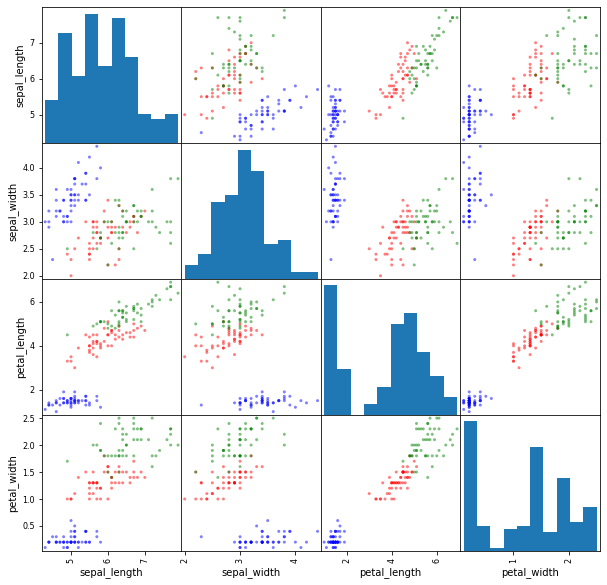

In [18]:
color_map = {
    'versicolor': 'r',
    'setosa': 'b',
    'virginica': 'g'
}

colors = [color_map[s] for s in df['species']]
scatter_matrix(df, color=colors, figsize=(10, 10))

<AxesSubplot:>

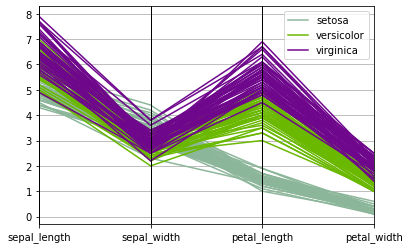

In [19]:
# parallel coordinate help us visualize multivariate data

from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'species')

In [20]:
# Create X (features) and y (response)
# the .drop method removes a specific column
X, y = df.drop('species', axis=1), df['species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [21]:
# predict y with KNN
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3) # instantiate the estimator

In [23]:
knn.fit(X,y) # fit with data

KNeighborsClassifier(n_neighbors=3)

In [24]:
# use the models .score method to get accuraccy
knn.score(X,y)

0.96

In [25]:
# predict a new data point
new_obs = np.array([6.3, 3.1, 5.1, 2.4]).reshape(1, 4)  # predict for a new observation

In [26]:
knn.predict(new_obs)

array(['virginica'], dtype=object)

In [27]:
# Predict for multiple observation at once
X_new = [[6.3, 3.1, 5.1,2.4], [3,5,2,2]]

In [28]:
knn.predict(X_new)

array(['virginica', 'setosa'], dtype=object)

In [29]:
# try a different value of k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [30]:
knn.predict(X_new)

array(['virginica', 'setosa'], dtype=object)

In [31]:
knn.predict_proba(X_new) # predicted probalities

array([[0., 0., 1.],
       [1., 0., 0.]])

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

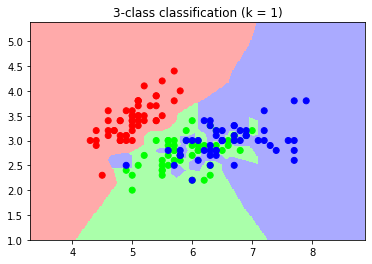

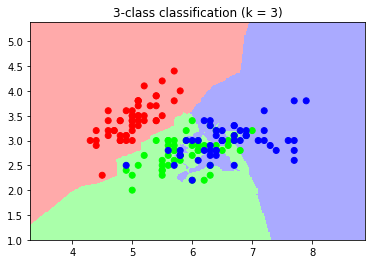

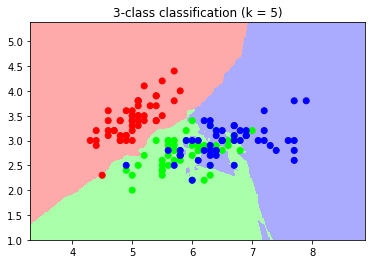

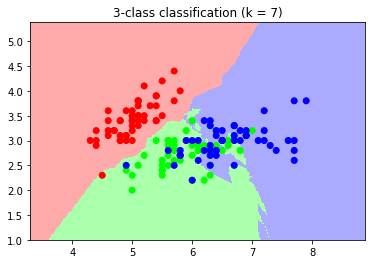

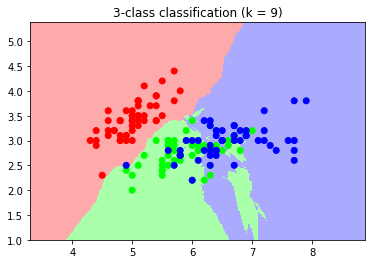

In [33]:
# Plot the decision boundaries of the model 

for n_neighbors in range(1, 10, 2):
    h = .02   # step size in the mesh
    
    # create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # we create an instance of Neighbours Classifier and fit the data
    irs = load_iris()
    X_only_2 = irs.data[:, :2] # We only take the first two features for ease
    y_only_2 = irs.target
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_only_2, y_only_2)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # Point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_only_2[:, 0].min() - 1, X_only_2[:, 0].max() + 1
    y_min, y_max = X_only_2[:, 1].min() - 1, X_only_2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X_only_2[:, 0], X_only_2[:, 1], c=y_only_2, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-class classification (k = %i)" % (n_neighbors))


plt.show()
    
    

In [34]:
# Compute the accuracy for k=5
# k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [35]:
# Supervised learning is not only about prediction but about finding relationship between variable

In [36]:
# For each column, use only that column to try and predict class
# This is called iterative feature selection

for column in X.columns:
    X_subset = X[[column]]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_subset, y)
    print(column, knn.score(X_subset, y))

sepal_length 0.76
sepal_width 0.54
petal_length 0.9533333333333334
petal_width 0.96


In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['sepal_length', 'sepal_width']] # Using only sepal measurments
knn.fit(X_subset, y)
knn.score(X_subset, y)

0.8533333333333334

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['petal_length', 'petal_width']] # using only petal measurment
knn.fit(X_subset, y)
knn.score(X_subset, y)

0.98

In [39]:
# You should normalise (scale) data when the scale of a column feature is
# either irrelevant and/or misleading
# you should not normalise when the scale is meaningful

# KNN uses the euclidean distance and considers its meaningful
# scaling our data is likely important.

In [43]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

# standard scaler can only take in numpy arrays, no dataframes
X_scaled = s.fit_transform(X[['petal_length', 'petal_width']].values)

In [45]:
# not scaled
knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['petal_length', 'petal_width']]
knn.fit(X_subset, y)
knn.score(X_subset,y)

0.98

In [46]:
# scaled
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

0.98

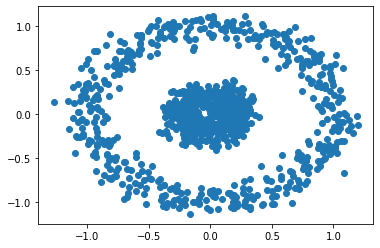

In [48]:
# KNN is a discriminitive , non-parametric model

# Discrimnative: It attempsts to model the conditional
# Probability between the response and the features

# Non-parametric: Knn Model makes no assumptions
# about the shape of the underlying datat, it is able to model
# data in funky shapes

from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:, 0], circles_X[:, 1])